In [87]:
import pickle
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
clf=[
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto'))]

clf2=[make_pipeline(StandardScaler(), LogisticRegression(max_iter=400))]*13
clf3=[make_pipeline(StandardScaler(), SGDClassifier())]*13

## Multiclass classifcation

In [93]:
x1=[[],[],[],[],[],[],[],[],[],[],[],[],[]]
x2=[[],[],[],[],[],[],[],[],[],[],[],[],[]]
x3=[[],[],[],[],[],[],[],[],[],[],[],[],[]]
x4=[[],[],[],[],[],[],[],[],[],[],[],[],[]]
x5=[[],[],[],[],[],[],[],[],[],[],[],[],[]]
x6=[[],[],[],[],[],[],[],[],[],[],[],[],[]]
x7=[[],[],[],[],[],[],[],[],[],[],[],[],[]]
x8=[[],[],[],[],[],[],[],[],[],[],[],[],[]]
x9=[[],[],[],[],[],[],[],[],[],[],[],[],[]]
x10=[[],[],[],[],[],[],[],[],[],[],[],[],[]]
x11=[[],[],[],[],[],[],[],[],[],[],[],[],[]]
x12=[[],[],[],[],[],[],[],[],[],[],[],[],[]]

f=open('x_ksp.txt','rb')
while True:
    try:
        a=pickle.load(f)
        for i in range(13):
            x12[i].append(a[i].detach().numpy())
    except EOFError as e:
        break


f=open('x_male_bdl.txt','rb')
while True:
    try:
        a=pickle.load(f)
        for i in range(13):
            x1[i].append(a[i].detach().numpy())
    except EOFError as e:
        break

f=open('x_male_awb.txt','rb')
while True:
    try:
        a=pickle.load(f)
        for i in range(13):
            x2[i].append(a[i].detach().numpy())
    except EOFError as e:
        break
f=open('x_male_jmk.txt','rb')
while True:
    try:
        a=pickle.load(f)
        for i in range(13):
            x3[i].append(a[i].detach().numpy())
    except EOFError as e:
        break

f=open('x_female_slt_data.txt','rb')
while True:
    try:
        a=pickle.load(f)
        for i in range(13):
            x4[i].append(a[i].detach().numpy())
    except EOFError as e:
        break
        
f=open('x_ljm.txt','rb')
while True:
    try:
        a=pickle.load(f)
        for i in range(13):
            x5[i].append(a[i].detach().numpy())
    except EOFError as e:
        break
        
f=open('x_slp.txt','rb')
while True:
    try:
        a=pickle.load(f)
        for i in range(13):
            x6[i].append(a[i].detach().numpy())
    except EOFError as e:
        break

f=open('x_lnh.txt','rb')
while True:
    try:
        a=pickle.load(f)
        for i in range(13):
            x9[i].append(a[i].detach().numpy())
    except EOFError as e:
        break
        
f=open('x_rxr.txt','rb')
while True:
    try:
        a=pickle.load(f)
        for i in range(13):
            x7[i].append(a[i].detach().numpy())
    except EOFError as e:
        break
f=open('x_rms.txt','rb')
while True:
    try:
        a=pickle.load(f)
        for i in range(13):
            x8[i].append(a[i].detach().numpy())
    except EOFError as e:
        break

f=open('x_fem.txt','rb')
while True:
    try:
        a=pickle.load(f)
        for i in range(13):
            x10[i].append(a[i].detach().numpy())
    except EOFError as e:
        break
f=open('x_gka.txt','rb')
while True:
    try:
        a=pickle.load(f)
        for i in range(13):
            x11[i].append(a[i].detach().numpy())
    except EOFError as e:
        break
        
        

        
        
x_com=[[],[],[],[],[],[],[],[],[],[],[],[],[]]

for i in range(len(x)):
    x_com[i]=np.asarray(x2[i][0:500]+x1[i][0:500]+x3[i][0:500]+x4[i][0:500]+x5[i][0:500]+x6[i][0:500]+x7[i][0:500]+x8[i][0:500]+x9[i][0:500]+x10[i][0:500]+x11[i][0:500]+x12[i][0:500])

y=np.ones((6000,))
y[0:500]=0
y[1000:1500]=2
y[1500:2000]=3
y[2000:2500]=4
y[2500:3000]=5
y[3000:3500]=6
y[3500:4000]=7
y[4000:4500]=8
y[4500:5000]=9
y[5000:5500]=10
y[5500:6000]=11


accuracy=[]

for i in range(len(clf)):
    X_train, X_test, y_train, y_test = train_test_split(x_com[i], y, test_size=0.20, random_state=42)
    clf[i].fit(X_train,y_train)
    y_pred=clf[i].predict(X_test)
    accuracy.append(len(np.where((y_pred-y_test)==0)[0])/len(y_test))



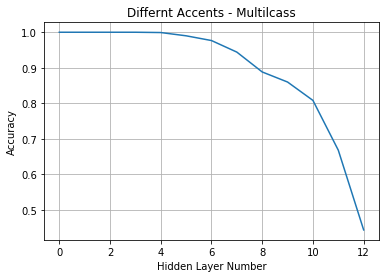

In [94]:
plt.plot(range(len(accuracy)),accuracy)
plt.xlabel("Hidden Layer Number")
plt.ylabel("Accuracy")
plt.title('Differnt Accents - Multilcass')
plt.grid()
plt.show()    

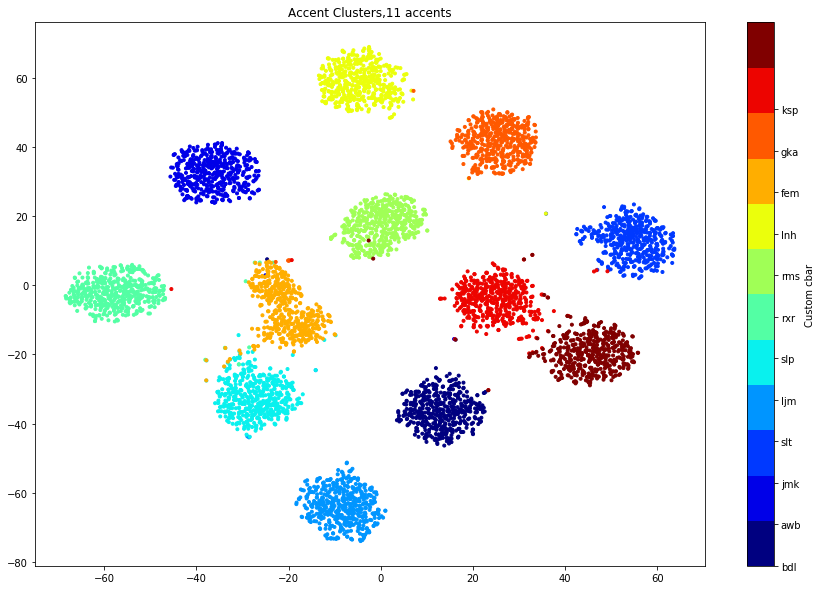

In [95]:
## TSNE
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

X=np.array(x_com[2])
pca=PCA(n_components=768)
pca.fit(X)

X=pca.transform(X)[:,:50]

X_embedded=TSNE(n_components=2).fit_transform(X)

N=12

tags=['bdl','awb','jmk','slt','ljm','slp','rxr','rms','lnh','fem','gka','ksp']

cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(1,1, figsize=(15,10))
scat=ax.scatter(X_embedded[:,0],X_embedded[:,1],marker='.',c=y,cmap=cmap,norm=norm)
cb=plt.colorbar(scat, spacing='proportional',ticks=bounds)
cb.set_label('Custom cbar')
ax.set_title('Accent Clusters,11 accents')

loc=np.arange(0,max(y),max(y)/float(len(tags)))
cb.set_ticks(loc)
cb.set_ticklabels(tags)
plt.savefig('Accent_cluster.png')

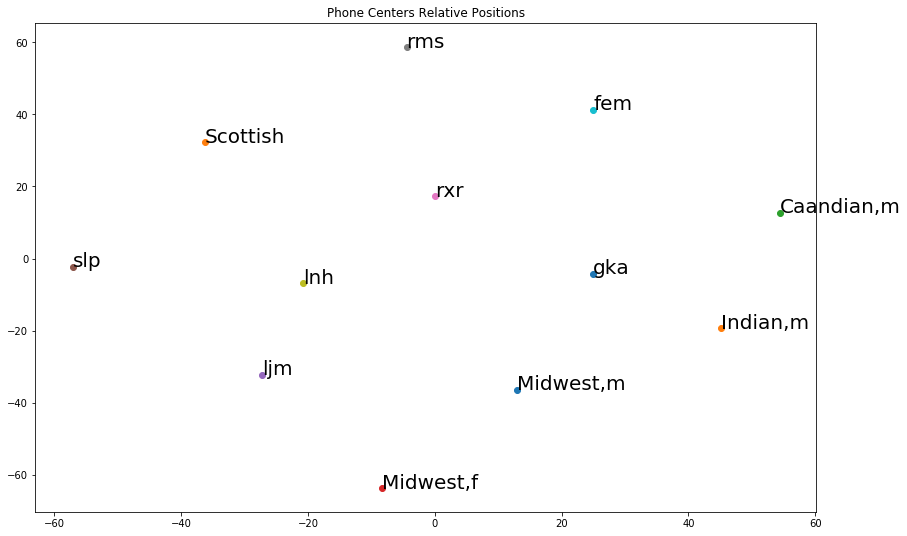

In [96]:
fig, ax=plt.subplots(1,1, figsize=(14,9))
tags=['Midwest,m','Scottish','Caandian,m','Midwest,f','ljm','slp','rxr','rms','lnh','fem','gka','Indian,m']
for i,phone in enumerate(tags):
#     #print(phone)
#     print(center)
#     #print(np.where(np.array(y)==i))
    center=np.mean(X_embedded[np.where(np.array(y)==i)[0],:],axis=0)
    plt.scatter([center[0]], [center[1]])
    plt.annotate(phone, (center[0], center[1]),fontsize=20)
ax.set_title('Phone Centers Relative Positions')
plt.savefig('phone_cluster_center.png')

In [92]:
np.mean(X_embedded[np.where(np.array(y)==1)[0],:],axis=0)

array([-3.3876772, 31.74433  ], dtype=float32)

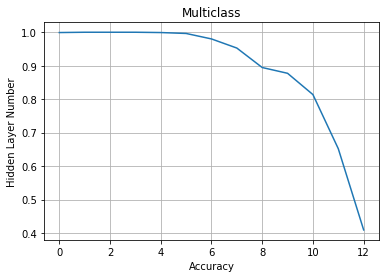

In [17]:
plt.plot(range(len(accuracy)),accuracy)
plt.xlabel("Accuracy")
plt.ylabel("Hidden Layer Number")
plt.title('Multiclass')
plt.grid()
plt.show()    

## Binary Classifcation

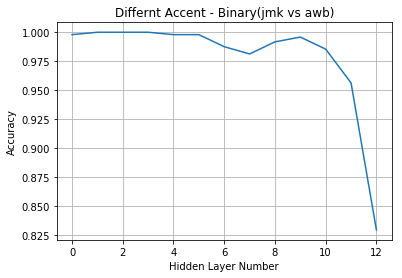

In [89]:
x=[[],[],[],[],[],[],[],[],[],[],[],[],[]]
f=open('x_male_awb.txt','rb')
while True:
    try:
        a=pickle.load(f)
        for i in range(13):
            x[i].append(a[i].detach().numpy())
    except EOFError as e:
        break

x1=[[],[],[],[],[],[],[],[],[],[],[],[],[]]
f=open('x_male_jmk.txt','rb')
while True:
    try:
        a=pickle.load(f)
        for i in range(13):
            x1[i].append(a[i].detach().numpy())
    except EOFError as e:
        break
x_com=[[],[],[],[],[],[],[],[],[],[],[],[],[]]

for i in range(len(x)):
    x_com[i]=np.asarray(x[i]+x1[i])

y=np.ones((1200,))
y[0:600]=0

accuracy=[]

for i in range(len(clf3)):
    X_train, X_test, y_train, y_test = train_test_split(x_com[i], y, test_size=0.40, random_state=42)
    clf3[i].fit(X_train,y_train)
    y_pred=clf3[i].predict(X_test)
    accuracy.append(len(np.where((y_pred-y_test)==0)[0])/len(y_test))

plt.plot(range(len(accuracy)),accuracy)
plt.xlabel("Hidden Layer Number")
plt.ylabel("Accuracy")
plt.title('Differnt Accent - Binary(jmk vs awb)')
plt.grid()
plt.show()    

## Binary- Indian Vs Ameraican accent

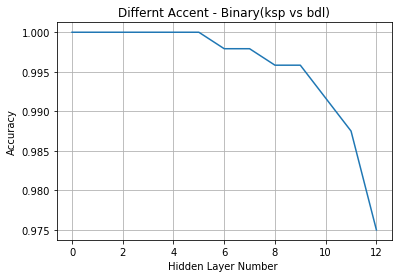

In [58]:
x=[[],[],[],[],[],[],[],[],[],[],[],[],[]]
f=open('x_male_bdl.txt','rb')
while True:
    try:
        a=pickle.load(f)
        for i in range(13):
            x[i].append(a[i].detach().numpy())
    except EOFError as e:
        break

x1=[[],[],[],[],[],[],[],[],[],[],[],[],[]]
f=open('x_ksp.txt','rb')
while True:
    try:
        a=pickle.load(f)
        for i in range(13):
            x1[i].append(a[i].detach().numpy())
    except EOFError as e:
        break
x_com=[[],[],[],[],[],[],[],[],[],[],[],[],[]]

for i in range(len(x)):
    x_com[i]=np.asarray(x[i]+x1[i])

y=np.ones((1200,))
y[0:600]=0

accuracy=[]

for i in range(len(clf)):
    X_train, X_test, y_train, y_test = train_test_split(x_com[i], y, test_size=0.40, random_state=42)
    clf[i].fit(X_train,y_train)
    y_pred=clf[i].predict(X_test)
    accuracy.append(len(np.where((y_pred-y_test)==0)[0])/len(y_test))

plt.plot(range(len(accuracy)),accuracy)
plt.xlabel("Hidden Layer Number ")
plt.ylabel("Accuracy")
plt.title('Differnt Accent - Binary(ksp vs bdl)')
plt.grid()
plt.show()    

In [49]:
!pip install pyroomacoustics


     |████████████████████████████████| 1.1 MB 706 kB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pyroomacoustics: filename=pyroomacoustics-0.4.3-cp37-cp37m-linux_x86_64.whl size=9614437 sha256=75c1270598cc9945057598a47af9e4b025a68e747255a723e079f33afbd7ac16
  Stored in directory: /home/siddhesh/.cache/pip/wheels/55/c6/8e/2876e4437924bf7dfaed81cf27e36aa5c81debd96e60ac3160
Successfully built pyroomacoustics


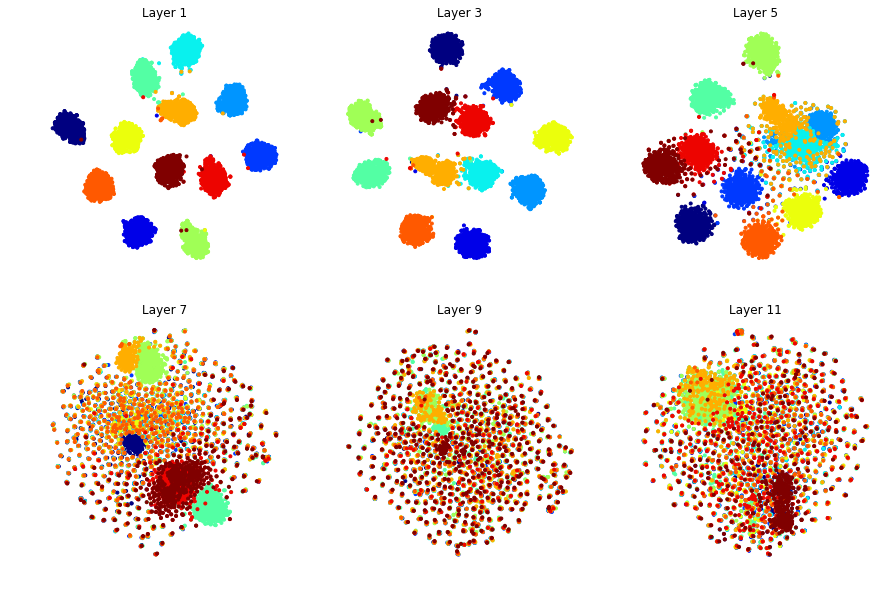

In [97]:
layers=[0,2,4,6,8,10]
subplot=[(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]
fig, ax = plt.subplots(2,3, figsize=(15,10))

for index, layer in enumerate(layers):
    # PCA for initial dimensionality reduction 768->50
    X=np.array(x_com[layer])
    pca=PCA(n_components=768)
    pca.fit(X)
    X=pca.transform(X)[:,:50]

    # t-SNE for final dimensionality reduction to get the class seperated visualization of clusters 50->2
    X_embedded=TSNE(n_components=2).fit_transform(X)

    N=12  # Number of phone classes
    tags=['bdl','awb','jmk','slt','ljm','slp','rxr','rms','lnh','fem','gka','ksp']

    # All phone class labels
     # plotting the clusters for each phone class
    cmap = plt.cm.jet
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

    bounds = np.linspace(0,N,N+1)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    scat=ax[subplot[index][0],subplot[index][1]].scatter(X_embedded[:,0],X_embedded[:,1],marker='.',c=y,cmap=cmap,norm=norm)
    ax[subplot[index][0],subplot[index][1]].set_title('Layer '+str(layer+1))
    ax[subplot[index][0],subplot[index][1]].axis('off')

plt.savefig('phone_cluster.png')
